## Initialization Phase + Data Info

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [6]:
df.Element.unique()

array(['Producer Price Index (2014-2016 = 100)',
       'Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

In [29]:
df = pd.read_csv('df_filtered.csv', index_col=0)
df_LCU = df[df.Element == 'Producer Price (LCU/tonne)'].reset_index(drop=True)
df_PPI = df[df.Element == 'Producer Price Index (2014-2016 = 100)'].reset_index(drop=True)

In [41]:
df.Element.value_counts()

Producer Price Index (2014-2016 = 100)    828
Producer Price (LCU/tonne)                136
Producer Price (SLC/tonne)                 16
Producer Price (USD/tonne)                 16
Name: Element, dtype: int64

In [32]:
df_PPI.head()

,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
0,MYS,01/01/1991,31/12/1991,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1991,7021,Annual value,43
1,MYS,01/01/1992,31/12/1992,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1992,7021,Annual value,43
2,MYS,01/01/1993,31/12/1993,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1993,7021,Annual value,44
3,MYS,01/01/1994,31/12/1994,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1994,7021,Annual value,45
4,MYS,01/01/1995,31/12/1995,Malaysia,226,Areca nuts,Producer Price Index (2014-2016 = 100),1995,7021,Annual value,45


### Filtered DF_LCU dataframe with accurate entries with ascending years

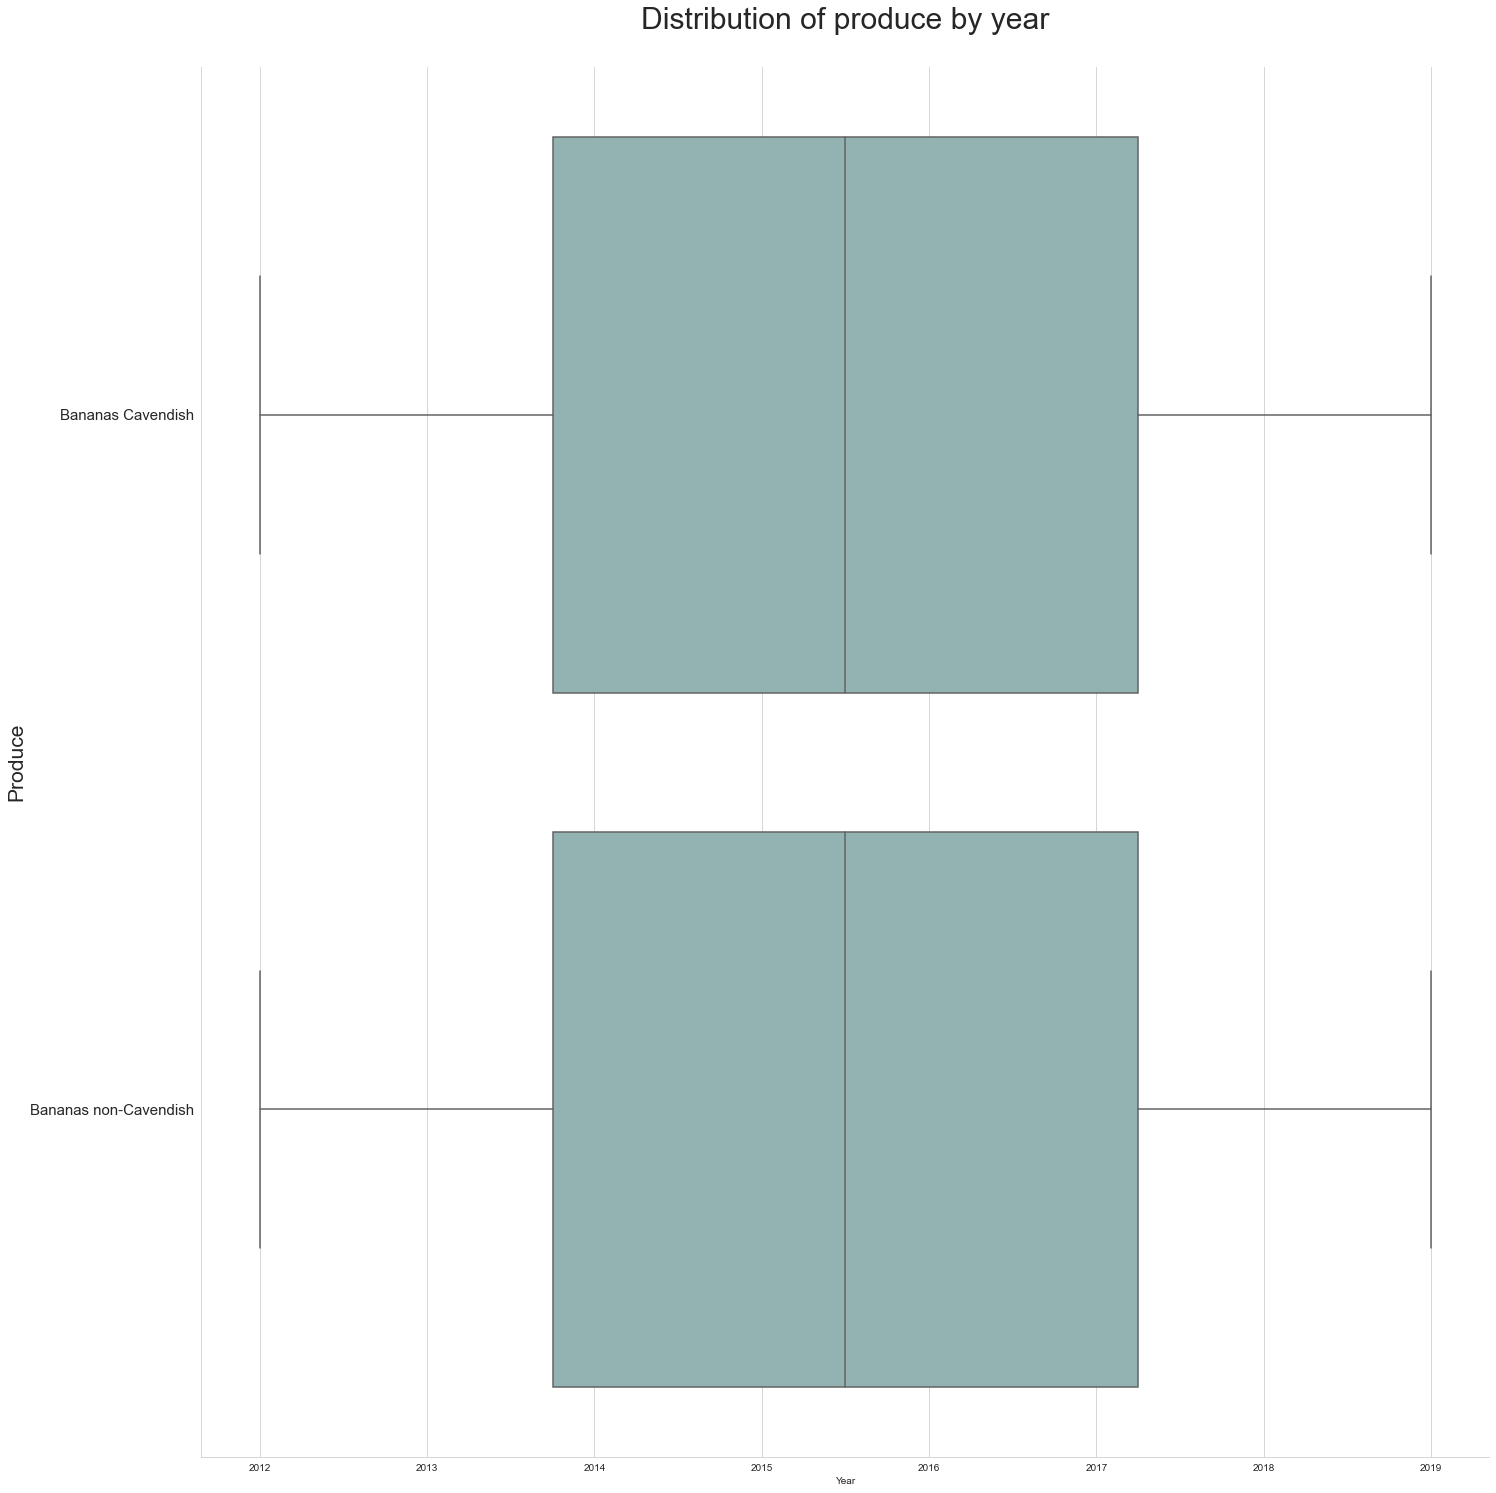

In [35]:
g = sns.catplot(
    data = df_LCU[df_LCU.Months == 'Annual value'],
    y = 'Item',
    x = 'Year',
    #aspect = 2.5,
    height = 20,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce by year\n', fontdict={'fontsize':30})
g.ax.set_yticklabels(df_LCU.Item.unique(), fontsize = '15')
g.ax.set_ylabel('Produce', fontsize = '21')
plt.show()